# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [96]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# nessa tarefa pode ser útil consultar os exercícios M5_E1, M6_E1 e M6_E2, pois esses utilizam a mesma base de dados

data = pd.read_csv('data/SINASC/SINASC_RO_2019.csv')

sinasc = pd.DataFrame(data)

print(sinasc.shape)

(27028, 69)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [98]:
def categoria_apgar5(apgar5):

    if 8 <= apgar5 <= 10:
        return 'normal'
    elif 6 <= apgar5 < 8:
        return 'asfixia leve'
    elif 4 <= apgar5 < 6:
        return 'asfixia moderada'
    elif 0 <= apgar5 < 4:
        return 'asfixia severa'
    else:
        return 'não preenchido'

sinasc['APGAR5_categoria'] = sinasc['APGAR5'].apply(categoria_apgar5)

apgar5_counts = sinasc['APGAR5_categoria'].value_counts()
apgar5_counts

APGAR5_categoria
normal              26463
asfixia leve          320
não preenchido        103
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

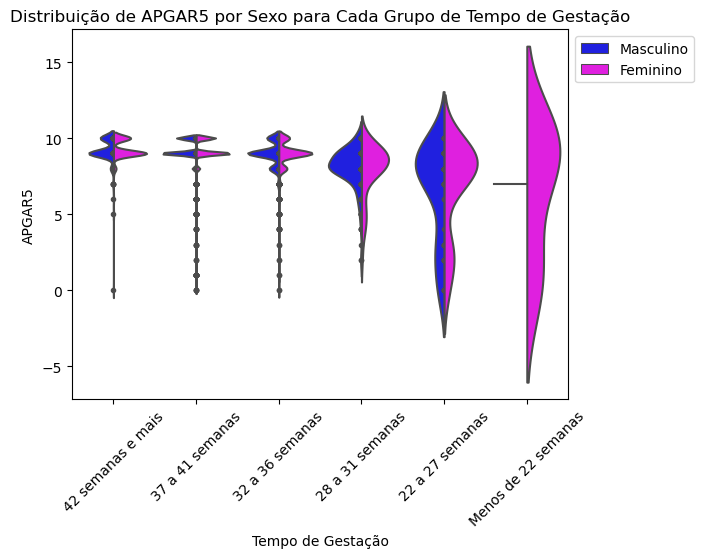

In [99]:
def grafico_violino():

    status_gestacao_lista = ['42 semanas e mais', '37 a 41 semanas', '32 a 36 semanas','28 a 31 semanas', '22 a 27 semanas', 'Menos de 22 semanas']

    custom_pallete = {
        'Masculino': 'blue',
        'Feminino': 'magenta'
    }
    
    sns.violinplot(x='GESTACAO',
                   y='APGAR5',
                   hue='SEXO',
                   data=sinasc,
                   order=status_gestacao_lista,
                   palette=custom_pallete,
                   inner='point',
                   split='true'
    )
    
    plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
    plt.xlabel('Tempo de Gestação')
    plt.ylabel('APGAR5')
    plt.legend(title='Sexo', loc='upper right')
    plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor legibilidade
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # legenda fora da caixa para não atrapalhar

grafico_violino() # Por que tem APGAR5 que vai até 15? wtf. ta indo até números negativos também... não entendi

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [100]:
APGAR_gestacao_crosstab = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
APGAR_gestacao_crosstab

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [106]:
# nessa linha, dividimos cada valor individual pelo somatório da linha
# ou seja, descobrimos o percentual de cada valor referente ao total

APGAR_gestacao_percentual = APGAR_gestacao_crosstab.div(APGAR_gestacao_crosstab.sum(axis=1), axis=0) * 100
APGAR_gestacao_percentual = APGAR_gestacao_percentual.round(2)
APGAR_gestacao_percentual

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.09,0.09,0.36,0.49,0.76,2.51,16.20,58.50,20.81
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95
Menos de 22 semanas,14.29,0.00,14.29,0.00,0.00,0.00,0.00,14.29,0.00,42.86,14.29


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '22 a 27 semanas'),
  Text(1, 0, '28 a 31 semanas'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '37 a 41 semanas'),
  Text(4, 0, '42 semanas e mais'),
  Text(5, 0, 'Menos de 22 semanas')])

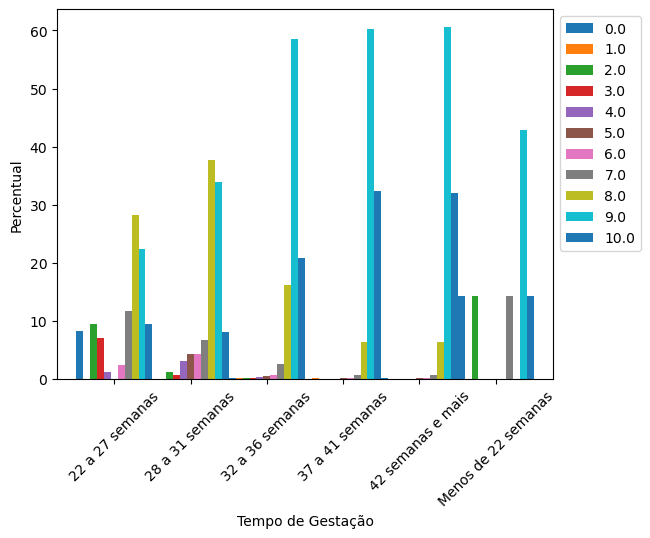

In [102]:
# NÃO CONSEGUI MUDAR A ORDEM DOS TÍTULOS DO EIXO X NEM F*, depois tento de novo zzzzz, não sei como mudar a ordem das linhas no crosstab()

APGAR_gestacao_percentual.plot(
    kind='bar',
    width=1
)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # legenda fora da caixa para não atrapalhar
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual')
plt.xticks(rotation=45)


É possível interpretar o gráfico acima para observar que quanto menor o tempo de gestação, maior o percentual de nascidos com APGAR5 em menores valores. Por mais que o período de 32 a 36 semanas não tenha esse fator tão atenuado como nas outras, ainda assim é evidente que em partos de 42 semanas ou mais o percentual de APGAR5 com notas maiores também é maior

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

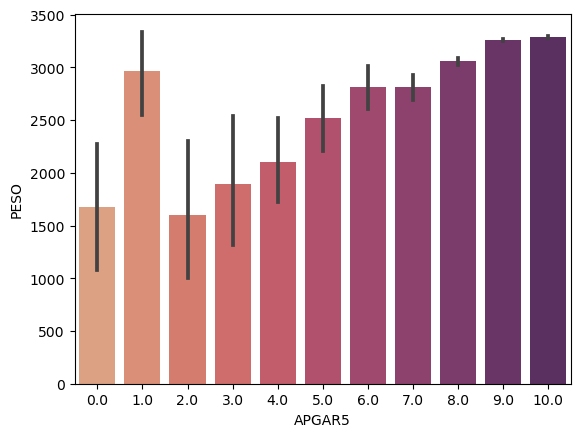

In [126]:
sns.color_palette("flare", as_cmap=True)

sns.barplot(
    data=sinasc,
    x='APGAR5',
    y='PESO',
    palette='flare',
)

Tentei diferentes formas de plotar essa representação acima, e pelos meus conhecimentos atuais acredito que essa seja a mais adequada.

É possível claramente observar a relação direta entre peso e APGAR5. Quanto maior o peso, maior o APGAR5, o que significa um bebê mais saudável.

Entretanto, existe, na nota de APGAR5 = 1, uma anomalia que não consegui identificar exatamente o porquê. Estou aberto a sugestões de como resolver esse impasse! Obrigado.